In [439]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.graph_objects as go


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Introduction
<font color=green>
This kernel includes exploratory data analysis and prediction of survivals for Titanic competition. 


---




<font color = 'blue'>

Contents

1. [Loading Data](#1)
2. [Data Description & Overview](#2)
3. [Univariate Analysis](#3)
   * [Categorical Variable Analysis](#4)
   * [Numerical Variable Analysis](#5)



4. [Basic Data Analysis](#6)


5. [Anomaly Detection & Elimination](#8)
    * [Filling Missing Values](#9)
        * [Embarked & Fare](#10)
        * [Age](#11)
        * [Cabin](#100)




6. [Visualizations & Brainstorming](#12)
    * [Number of Siblings ~ Survival Rate](#13)
    * [Number of Family Members ~ Survival Rate](#14)
    * [Ticket Class ~ Survival Rate](#15)
    * [Age ~ Survival Rate](#16)
    * [Pclass-Age-Survived](#7)
    * [Pclass-Embarked-Sex-Survived](#17)
    * [Embarked-Sex-Survived-Fare](#18)
    
    
7. [Feature Engineering](#19)


8. [Pre-processing](#20)
    * [Drop Unnecessary Features](#21)
    * [One-hot Encoding](#22)
    * [Train-Test Split](#23)


9. [Classification](#24)
    * [Basic ML Classification Algorithms](#25)
    * [Ensemble Modelling](#26)
        1. [Voting Classifier](#26)
        2. [Boosting Methods](#27)
        3. [Stacking](#28)
        
        
        
10. [Submission](#29)

<a id = "1"></a>
## 1. Loading Data

We load both train and test as pandas dataframes from relevant paths.

In [440]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test  = pd.read_csv('/kaggle/input/titanic/test.csv')

<a id = "2"></a>

## 2. Data Description & Overview

In [441]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S


<a id = "2"></a>



1. **PassengerId :** unique ID number to each passenger
1. **Survived :** Survived(1) or Died(0) passenger
1. **Pclass :** Ticket class of each passenger; 1(upper class), 2(medium class), 3(lower class)
1. **Name :** Passenger name
1. **Sex :** Sex of passenger
1. **Age :** Age of passenger
1. **SibSp :** # of siblings
1. **Parch :** # of parents / children
1. **Ticket :** Ticker number
1. **Fare :** Amount of money spent on ticket
1. **Cabin :** Cabin number
1. **Embarked :** Port of embarkation

In [442]:
print('Train Data Info\n')
train.info()
print('\n\n\nTest Data Info\n')
test.info()

Train Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



Test Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

**Data Types**

<font color = 'blue'>

* float64(2) : Age, Fare
* int64(4)   : PassengerId, Survived, Pclass, SibSp, Parch
* object(5)  : Name, Sex, Ticket, Cabin, Embarked

In [443]:
print('Train Data\n')
print(train.isnull().sum().sort_values(ascending=False))
print('\nTest Data\n')
print(test.isnull().sum().sort_values(ascending=False))

Train Data

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Test Data

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64


Obviously, there are some missing values in several features as well. They will be dealt with later. 
    
But for now, let's count and visualize them.

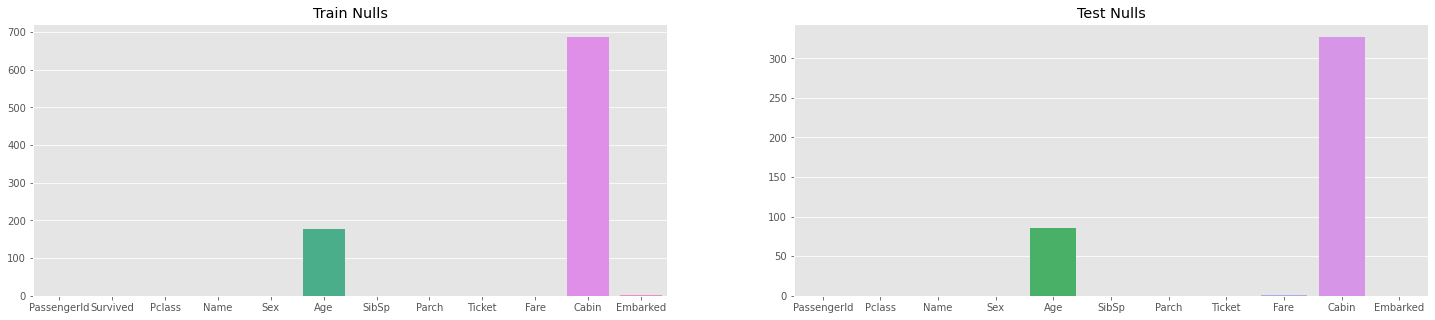

In [444]:
fig, ax  = plt.subplots(1,2, figsize=(25,5))

ax[0].set_title('Train Nulls')
sns.barplot(x=train.columns, y=train.isnull().sum(), ax=ax[0])
ax[1].set_title('Test Nulls')
sns.barplot(x=test.columns, y=test.isnull().sum(), ax=ax[1])
plt.show()

<font color = 'blue'>
    
Now let's take a look at the descriptive statistics of the data, outliers will be found and visualized by boxplots later. 

In [445]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "3"></a>

# 3. Univariate Analysis

<font color = 'blue'>
    
**Categorical Features:** <font color = 'black'>Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked, SibSp, Parch,

<font color = 'blue'>
**Numerical Features:** <font color = 'black'>PassengerId, Age, Fare

<a id = "4"></a>

## Categorical Variable Analysis



<font color = 'blue'>
* Counts of Categorical Features

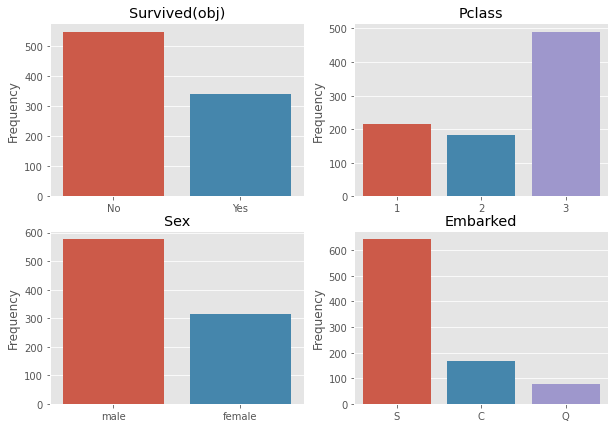

In [446]:
cat1 = ['Survived(obj)', 'Pclass', 'Sex', 'Embarked']

train['Survived(obj)'] = ['Yes' if i == 1 else 'No' for i in train.Survived]

fig, axs = plt.subplots(2,2, figsize=(10,7))

c = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        sns.barplot(train[cat1[c]].value_counts().index, train[cat1[c]].value_counts().values, ax=axs[i][j])
        axs[i][j].set_title(cat1[c])
        axs[i][j].set_ylabel('Frequency')
        c += 1
train.drop(['Survived(obj)'], axis=1, inplace=True)

In [447]:
# cat1 = ['Survived(obj)', 'Pclass', 'Sex', 'Embarked']

# train['Survived(obj)'] = ['Yes' if i == 1 else 'No' for i in train.Survived]

# fig, axs = plt.subplots(2,2, figsize=(15,10))

# c = 0
# for i in range(axs.shape[0]):
#     for j in range(axs.shape[1]):
#         sns.countplot(train[cat1[c]], ax=axs[i][j], hue=train[cat1[c]])
#         axs[i][j].set_title(cat1[c])
#         c += 1
# train.drop(['Survived(obj)'], axis=1, inplace=True)

<font color = 'blue'>

* Percentages of Different Numbers of Parents and Siblings

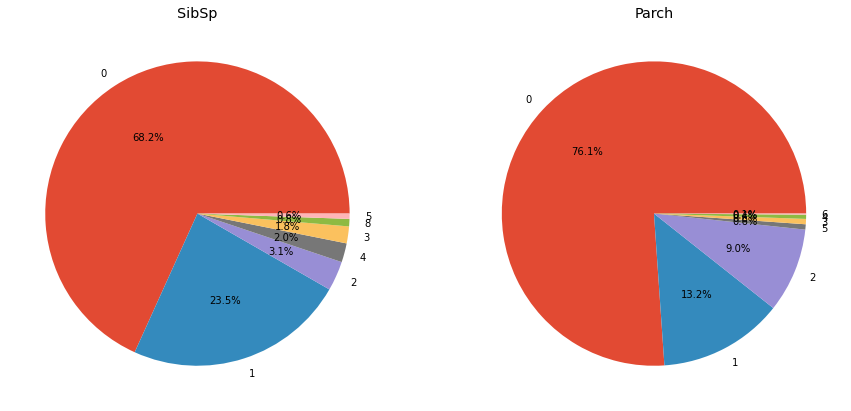

In [448]:
cat2 = ['SibSp','Parch']

fig, axs = plt.subplots(1,2, figsize=(15,10))

for i in range(axs.shape[0]):
    axs[i].pie(train[cat2[i]].value_counts().values, labels=train[cat2[i]].value_counts().index, autopct='%1.1f%%')
    axs[i].set_title(cat2[i])

<font color = 'blue'>
* Value Counts of Other Categorical Features

In [449]:
cat2 = ['Name', 'Ticket', 'Cabin']

for i in cat2:
    print(train[i].value_counts(),'\n\n')

van Melkebeke, Mr. Philemon                       1
Levy, Mr. Rene Jacques                            1
Emanuel, Miss. Virginia Ethel                     1
Harper, Mrs. Henry Sleeper (Myna Haxtun)          1
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)    1
                                                 ..
Collyer, Mr. Harvey                               1
Artagaveytia, Mr. Ramon                           1
Becker, Master. Richard F                         1
Nakid, Miss. Maria ("Mary")                       1
Bing, Mr. Lee                                     1
Name: Name, Length: 891, dtype: int64 


347082           7
CA. 2343         7
1601             7
347088           6
3101295          6
                ..
SC/PARIS 2149    1
695              1
SC/AH 3085       1
315090           1
PC 17600         1
Name: Ticket, Length: 681, dtype: int64 


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
C90            1
D19            1

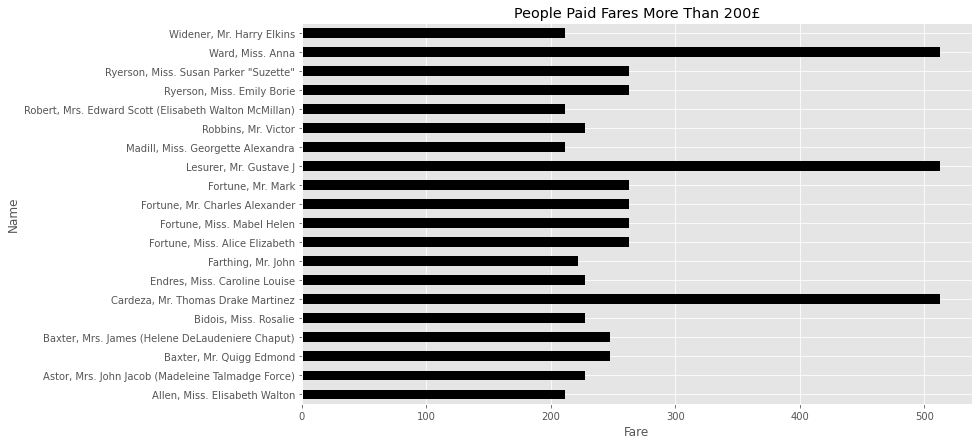

In [450]:
plt.figure(figsize=(12,7))
train[train.Fare > 200].groupby('Name')['Fare'].max().plot(kind='barh', color='black')
plt.title('People Paid Fares More Than 200£')
plt.xlabel('Fare')
plt.show()

<a id = "5"></a>

### Numerical Analysis

<font color = 'blue'>
* Distributions of Age and Fare w.r.t. Ticket Class

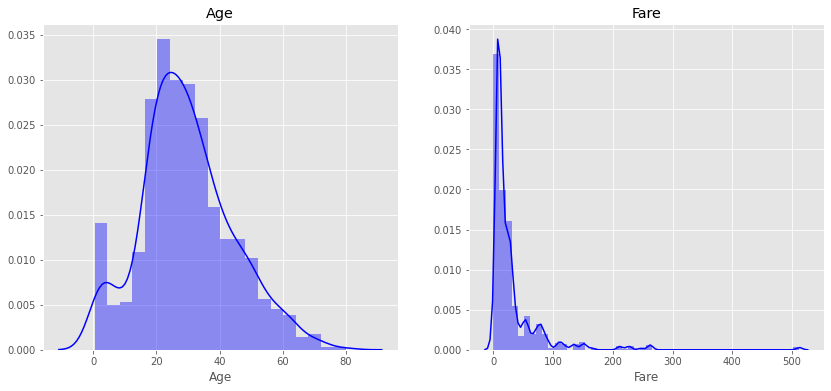

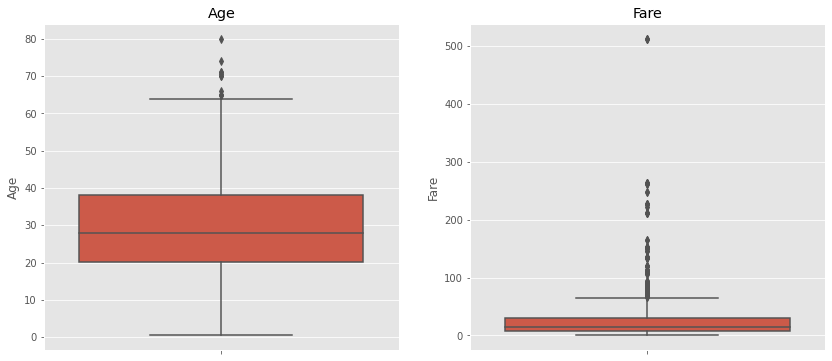

In [451]:
num = ['Age','Fare']

fig, axs = plt.subplots(1,2, figsize=(14,6))

for i in range(axs.shape[0]):
    sns.distplot(train[num[i]], ax=axs[i], color='blue')
    axs[i].set_title(num[i])
    
f, axs2 = plt.subplots(1,2, figsize=(14,6))
for i in range(axs.shape[0]):
    sns.boxplot(y = num[i], ax=axs2[i], data=train)
#     sns.swarmplot(y = num[i], ax=axs2[i], data=train, x='Pclass', color='.25')
    axs2[i].set_title(num[i])

<b id = "6">

# 4. Basic Data Analysis

<font color = 'blue'>
* Ratio of Survivals w.r.t. Genders

In [452]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


<font color = 'blue'>
* Heatmap of Survivals w.r.t Ticket Classes and Genders

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

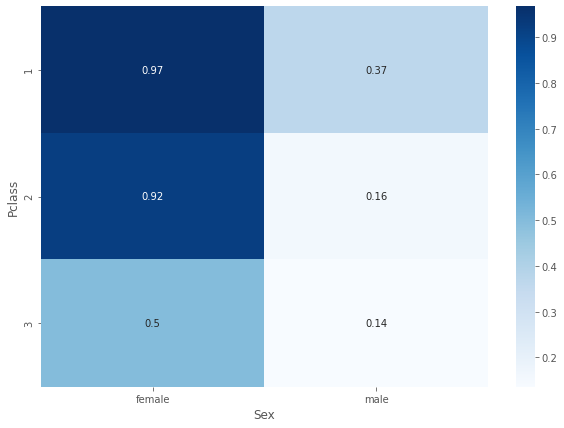

In [453]:
pvt = train.groupby(['Pclass','Sex'], as_index=0)['Survived'].mean()

plt.figure(figsize=(10,7))
sns.heatmap(pvt.pivot('Pclass','Sex','Survived'), cmap='Blues', annot=True)

train.groupby(['Pclass','Sex'])[['Survived']].mean()#.plot(kind='barh')

<font color = 'red'>

* Number of Survivals w.r.t Ticket Classes and Genders

<a id = "8"></a>

# 5. Anomaly Detection & Elimination

In [454]:
from collections import Counter as count

def detect_outliers(data, features):
    indices = []
    for f in features:
        q1 = np.quantile(data[f], .25) #np.nanpercentile(data[f], .25)
        q3 = np.quantile(data[f], .75) #np.nanpercentile(data[f], .75)
        iqr = np.abs(q3 - q1)
        
        min_val = q1 - 1.5 * iqr
        max_val = q3 + 1.5 * iqr
        
#         indices.extend([idx for idx, i in enumerate(data[f]) if i < min_val or i > max_val])
        indices.extend(data[(data[f] < min_val) | (data[f] > max_val)].index)
    
    outliers_morethan2 = [k for k,v in count(indices).items() if v > 2]
    
    return outliers_morethan2

In [455]:
outlier_indices = detect_outliers(train, ['SibSp','Parch','Fare'])
print(len(outlier_indices))

train = train.iloc[~train.index.isin(outlier_indices)].reset_index()
# or
# traindata = train.drop(outlier_indices, axis=0).reset_index()

10


In [456]:
data = pd.concat([train, test], axis=0).reset_index()

data.isnull().sum().sort_values(ascending=False)[data.isnull().sum() > 0]

Cabin       1007
index        418
Survived     418
Age          256
Embarked       2
Fare           1
dtype: int64

<a id = "9"></a>

## Filling Missing Values


<a id = "10"></a>

### Embarked & Fare


<font color= 'blue'>
* Below table shows **mean and median values of each ticket class and embarkation port** in order to be able to decide what to fill with null values.

In [457]:
data.groupby(['Pclass','Embarked'])[['Fare']].agg(['mean','median'])

Fare         
                       mean   median
Pclass Embarked                     
1      C         106.845330  76.7292
       Q          90.000000  90.0000
       S          68.857544  52.0000
2      C          23.300593  15.3146
       Q          11.735114  12.3500
       S          21.206921  15.3750
3      C          11.021624   7.8958
       Q          10.390820   7.7500
       S          13.643221   8.0500

<font color= 'blue'>
* Features Corresponding to Embarked nulls: <font color= 'red'> Fare: 80 - Pclass: 1


<font color= 'black'>
The closest corresponding Embarkation Port for those values: --> <font color= 'blue'>
**C** 

In [458]:
data[data.Embarked.isnull()]

,level_0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,index
60,60,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,61.0
821,821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,829.0


<font color= 'blue'>
* Features Corresponding to Fare null: <font color= 'red'> Embarked: S - Pclass: 3


<font color= 'black'>
The closest corresponding Fare for those values: --> <font color= 'blue'>
**Median = 8.05** 

In [459]:
data[data.Fare.isnull()]

,level_0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,index
1033,152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,NaN


* Embarked

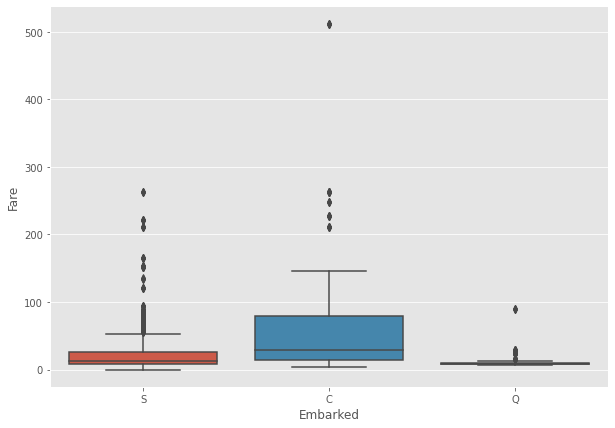

In [460]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Fare', x='Embarked', data=data)
plt.show()

In [461]:
data['Embarked'] = data.Embarked.fillna('C')
print('Missing values in "Embarked" column: ',data.Embarked.isnull().sum())

Missing values in "Embarked" column:  0


In [462]:
data['Fare'] = data.Fare.fillna(data[(data.Pclass == 3) & (data.Embarked == 'S')]['Fare'].median())

print('Missing values in "Fare" column: ',data.Fare.isnull().sum())

Missing values in "Fare" column:  0


<a id = "11"></a>

## Age

In [463]:
print('Null Age values: ',data.Age.isnull().sum())

Null Age values:  256


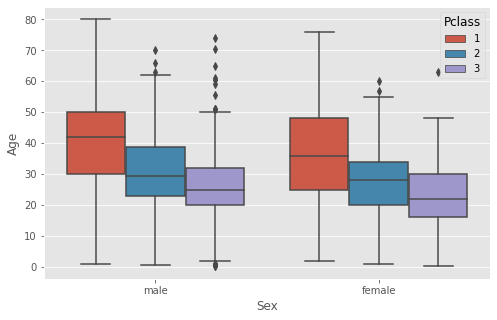

In [464]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data.Age, x=data.Sex, hue=data.Pclass)
plt.show()

<font color ='blue'>
    
While ticket classes got higher, the median of ages gradually increased by nearly same ratio for both males and females.
<font color='green'>

----

* So, 'Pclass' feature may be convenient to fill null Age values.

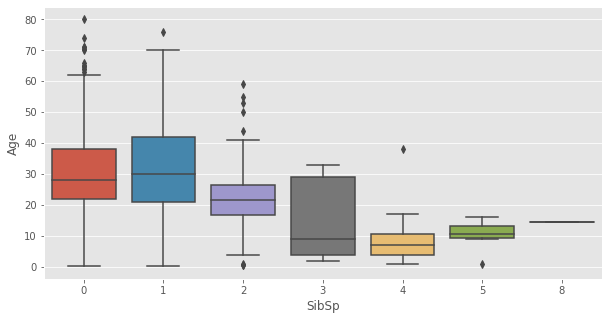

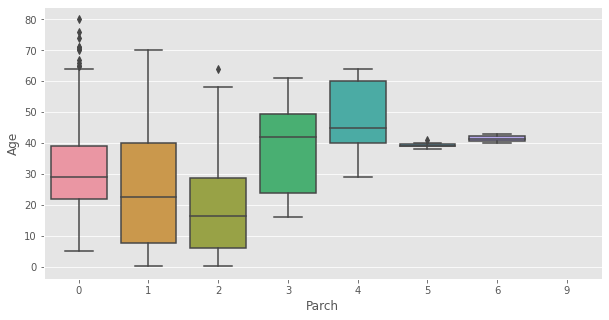

In [465]:
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Age, x=data.SibSp)

plt.figure(figsize=(10,5))
sns.boxplot(y=data.Age, x=data.Parch)
plt.show()

<font color='blue'>
    
'SibSp' and 'Parch' features seem to have a negative and positive correlation with Age respectively.
<font color='green'>

---
These values also can be used to fill null values of Age.



Let's see the actual relationship among these features.

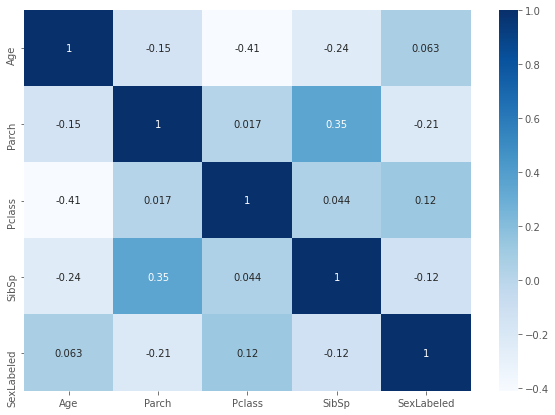

In [466]:
data['SexLabeled'] = [0 if i =='female' else 1 for i in data.Sex]

plt.figure(figsize=(10,7))
sns.heatmap(data[['Age','Parch','Pclass','SibSp','SexLabeled']].corr(), cmap='Blues', annot=True)
plt.show()

<font color='blue'>
As seen in the above graph(heatmap), the features having some correlation with Age are 'Pclass', 'SibSp' and 'Parch' at 0.41, -0.24, -0.15 respectively. 

<font color= 'red' >
* Let's fill the null values with median of 'Age' values having the same corresponding values of 'Pclass', 'SibSp' and 'Parch'.

In [467]:
# indices of missing values
null_indices = [i for i in data[data.Age.isnull()].index]


for idx in null_indices:
    age_med = data.Age[(data.Pclass == data.Pclass.iloc[idx]) & (data.SibSp == data.SibSp.iloc[idx]) & (data.Parch == data.Parch.iloc[idx])].median()
    
    if not np.isnan(age_med):
        data.Age.iloc[idx] = age_med
    else:
        data.Age.iloc[idx] = data.Age.median()

In [468]:
print('Missing values in "Age" column: ',data.Age.isnull().sum())

Missing values in "Age" column:  0


In [469]:
# def age_outliers(data, features):
#     indices = []
#     for f in features:
#         q1 = np.quantile(data[f], .25) #np.nanpercentile(data[f], .25)
#         q3 = np.quantile(data[f], .75) #np.nanpercentile(data[f], .75)
#         iqr = np.abs(q3 - q1)
        
#         min_val = q1 - 1.5 * iqr
#         max_val = q3 + 1.5 * iqr
        
# #         indices.extend([idx for idx, i in enumerate(data[f]) if i < min_val or i > max_val])
#         indices.extend(data[(data[f] < min_val) | (data[f] > max_val)].index)
    
#     outliers_morethan2 = [k for k,v in collections.Counter(indices).items()]
    
#     return outliers_morethan2


# data = data.drop(age_outliers(data, ['Age']), axis= 0).reset_index(drop=True)

<b id= 100>
## Cabin

In [470]:
data['Cabin'] = data.Cabin.fillna('U')
data['Cabin'] = [i[0][0] for i in data.Cabin]

data.Cabin.value_counts(dropna=False)

U    1007
C      91
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

,mean,count
Cabin,,
A,0.466667,15
B,0.744681,47
C,0.589286,56
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
U,0.302941,680


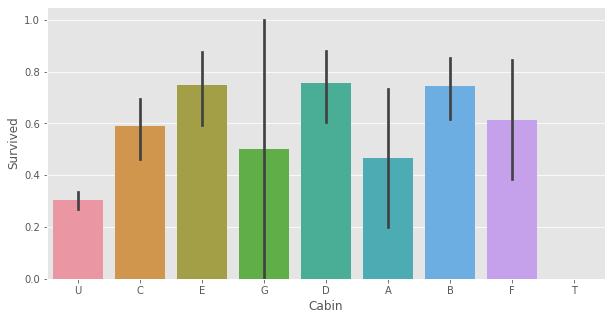

In [471]:
plt.figure(figsize=(10,5))
sns.barplot(data.Cabin, data.Survived)

data.groupby('Cabin').Survived.agg({'mean','count'})

<b id = "12">


# 6. Visualizations & Brainstorming

In [472]:
data.sample(5)

,level_0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,index,SexLabeled
288,288,24.0,U,S,8.8500,"Haas, Miss. Aloisia",0,294,3,female,0,0.0,349236,293.0,0
900,19,45.0,U,C,7.2250,"Assaf Khalil, Mrs. Mariana (Miriam"")""",0,911,3,female,0,NaN,2696,NaN,0
802,802,26.0,U,S,7.8875,"Alexander, Mr. William",0,811,3,male,0,0.0,3474,810.0,1
1144,263,1.0,U,S,12.1833,"Klasen, Miss. Gertrud Emilia",1,1155,3,female,1,NaN,350405,NaN,0
661,661,43.0,U,S,8.0500,"Cook, Mr. Jacob",0,669,3,male,0,0.0,A/5 3536,668.0,1


<b id='13'>
## Number of Siblings ~ Survival Rate

,count,mean
SibSp,,
0,608,0.345395
1,209,0.535885
2,28,0.464286
3,13,0.153846
4,18,0.166667
5,5,0.000000
8,0,NaN


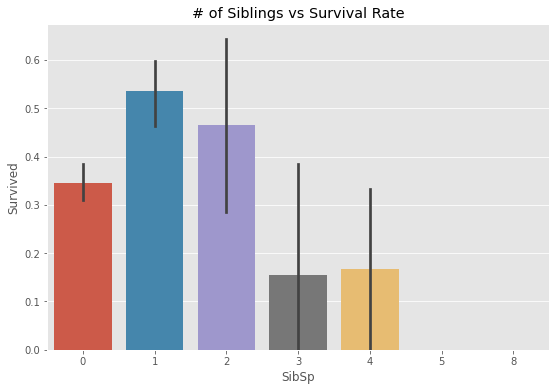

In [473]:
plt.figure(figsize=(9,6))
sns.barplot(x=data.SibSp, y=data.Survived)
plt.title('# of Siblings vs Survival Rate')

data.groupby('SibSp').Survived.agg(['count','mean'])

<font color='blue'>
* Having siblings more than 2 may be thought as an indication of lower survival rate.

---
<font color='green'>
    
0.3 can be a threshold for a new feature extraction from the graph.


---
<font color='red'> 
Notice that the lines in the middle of the bars represent the confidence intervals drawn by bootstrapping, and they are inversely proportional with the count of each category. 

<font color='blue'> 
* SE = std / (n^(1/2)
* confidence interval = {mean(x) -2x(SE), mean(x) +2x(SE)}

<b id='14'>

## Number of Parent / Children ~ Survival Rate

,count,mean
Parch,,
0,678,0.343658
1,118,0.550847
2,70,0.542857
3,5,0.600000
4,4,0.000000
5,5,0.200000
6,1,0.000000
9,0,NaN


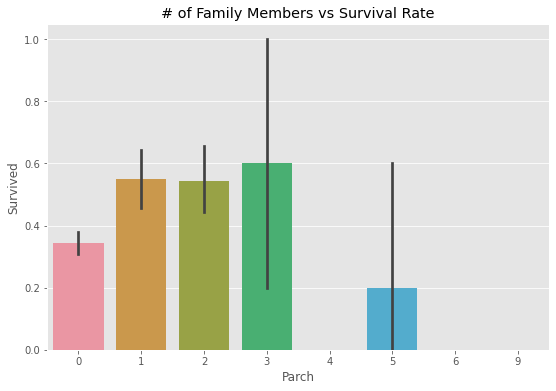

In [474]:
plt.figure(figsize=(9,6))
sns.barplot(x=data.Parch, y=data.Survived)
plt.title('# of Family Members vs Survival Rate')

data.groupby('Parch').Survived.agg(['count','mean'])

<font color='blue'> 

* Having more than 3 parent / children may be a criterion of lower survival rate.




<b id='15'>

## Ticket Class ~ Survival Rate

Pclass
1    0.629108
2    0.472826
3    0.245868
Name: Survived, dtype: float64

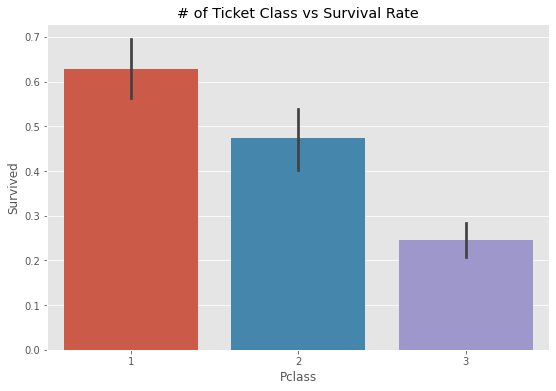

In [475]:
plt.figure(figsize=(9,6))
sns.barplot(x=data.Pclass, y=data.Survived)
plt.title('# of Ticket Class vs Survival Rate')

data.groupby('Pclass').Survived.mean()

<font color ='blue'>
    
* Having a higher class ticket yields a better survival chance. While it's 0.63 for higher class, it gradually decreased around 0.15 and 0.25 for each class.

<b id='16'>

## Age ~ Survival Rate

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
5.00     1.000000
12.00    1.000000
13.00    1.000000
37.50    1.000000
53.00    1.000000
63.00    1.000000
80.00    1.000000
3.00     0.833333
15.00    0.800000
1.00     0.714286
Name: Survived, dtype: float64

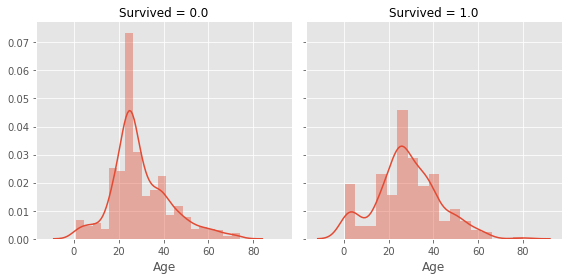

In [476]:
g = sns.FacetGrid(data=data, col='Survived', size=4)
g.map(sns.distplot, 'Age')

data.groupby('Age').Survived.mean().nlargest(15)

<font color='blue'>
* Majority of 20-30 year-olds couldn't survive.
* In contrast, 30-40 year-olds mostly survived.
* The highest survival rates are for the infants **(<10)** as seen in the figures.

---
<font color='green'>

Thus, life cycle can be a criterion in predicting survivors, furthermore, this feature can be converted to categorical. 

<b id='7'>

## Pclass-Age-Survived

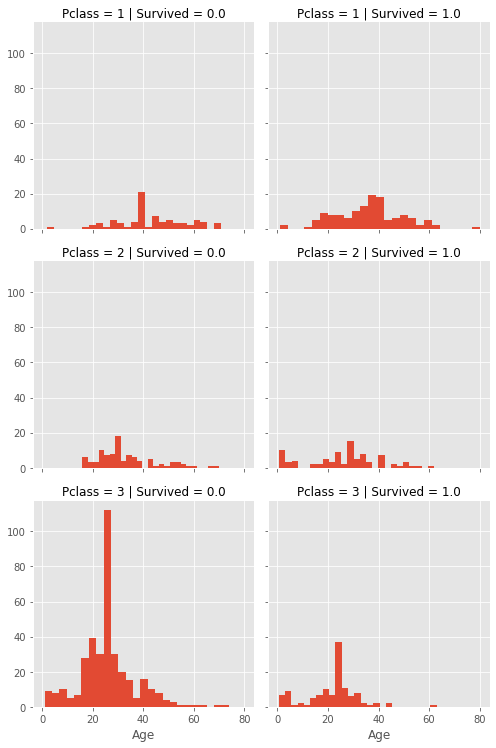

In [477]:
g = sns.FacetGrid(data= data, col='Survived', row='Pclass',size=3.5)
g.map(plt.hist, 'Age', bins=25)
plt.show()

<font color='blue'>

* Although Pclass = 3 has the highest boarding number, the survival rate is the lowest.
* Pclass = 1 has the highest survival rate.

--- 
<font color='green'>

As in the Age~Survived analysis above, here it's also seen that children are privileged.

<b id='17'>
## Pclass-Embarked-Sex-Survived

Sex     Pclass  Embarked
female  1       C           0.977778
                Q           1.000000
                S           0.956522
        2       C           1.000000
                Q           1.000000
                S           0.910448
        3       C           0.652174
                Q           0.727273
                S           0.388235
male    1       C           0.404762
                Q           0.000000
                S           0.358974
        2       C           0.200000
                Q           0.000000
                S           0.154639
        3       C           0.232558
                Q           0.076923
                S           0.130268
Name: Survived, dtype: float64

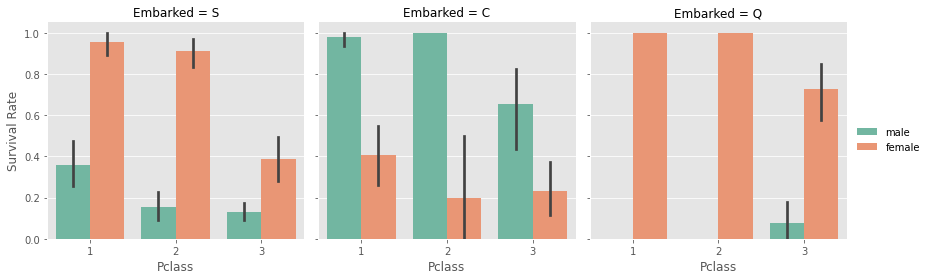

In [478]:
g = sns.FacetGrid(data= data, col='Embarked', size=4)
g = g.map(sns.barplot, 'Pclass', 'Survived','Sex', palette='Set2')
g.add_legend()
g.set_axis_labels('Pclass', 'Survival Rate')

data.groupby(['Sex','Pclass','Embarked']).Survived.mean()

<a id='12'>
<font color='red'>

As might have seen in the information above the plot, the **MIDDLE FIGURE** is wrong: hue must be exact opposite.

* Green: Female
* Orange: Male

------
<font color='blue'>

* For all classes and embarkation ports, females has much higher survival ratio than males. 


---
<font color='green'>

These features can directly be used in training phase.

<b id=18>

## Embarked-Sex-Survived-Fare

Sex     Embarked  Survived
female  C         0.0         16.215278
                  1.0         83.355429
        Q         0.0         10.904633
                  1.0         13.211733
        S         0.0         23.537433
                  1.0         41.431250
male    C         0.0         38.065342
                  1.0         71.468545
        Q         0.0         13.911732
                  1.0         12.916667
        S         0.0         18.650658
                  1.0         30.366286
Name: Fare, dtype: float64

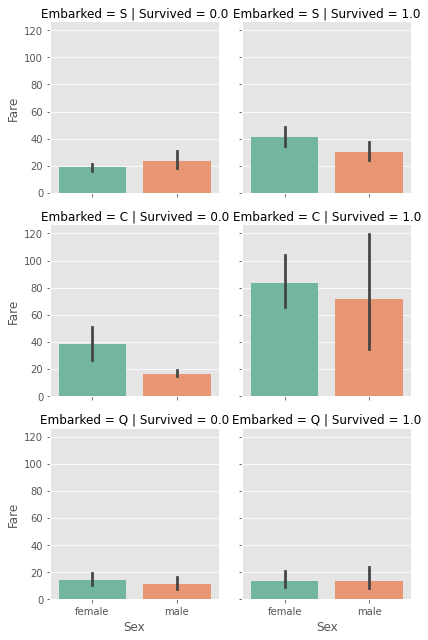

In [479]:
g = sns.FacetGrid(data = data, row='Embarked', col='Survived')
g = g.map(sns.barplot, 'Sex', 'Fare', palette='Set2')

data.groupby(['Sex','Embarked','Survived']).Fare.mean()

<font color='red'>
The same issue shows up [here](#12) again in some plots. The rightness of the plots can be verified through the information right above them.
    
<font color='blue'>
    
* Given the ports C and S; passengers who paid more fare tend to have a higher rate of survival regardless of their sex.

* As to the passengers boarded at port C, the survival rate seems to be unassociated with the fare.

* To sum up, the higher fare a passenger pays, the higher survival rate they have.
 
<font color='green'>

Fair can be converted to a categorical feature for training.

<b id=19>
# 7. Feature Engineering

### Title

In [480]:
data['Title'] = [i.split('.')[0].split(',')[1].strip() for i in data.Name]

Mr              753
Miss            255
Mrs             197
Master           60
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Don               1
Jonkheer          1
Dona              1
the Countess      1
Capt              1
Mme               1
Lady              1
Sir               1
Name: Title, dtype: int64

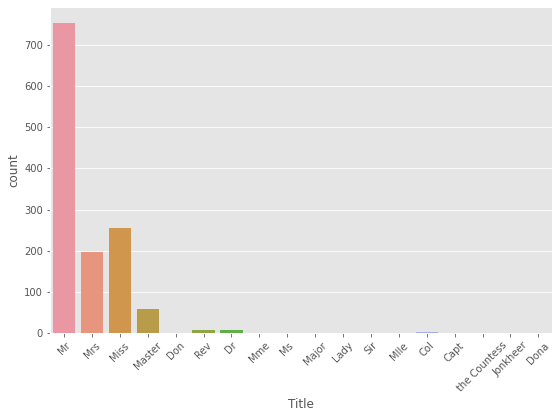

In [481]:
plt.figure(figsize=(9,6))
sns.countplot(data.Title)
plt.xticks(rotation=45)

data.Title.value_counts()

<font color='blue'>
    
* Aggregate rare titles -->  <font color='red'>whose # <50

In [482]:
data['Title'] = data['Title'].replace([data.Title.value_counts().index[idx] for idx,title in enumerate(data.Title.value_counts()) if data['Title'].value_counts()[idx] < 50], 'other')

<font color='blue'>

* Now, label encoding of new categories.

In [483]:
data['Title'] = [0 if title=='Mr' else 1 if title=='Mrs' or title=='Miss' else 2 if title=='Master' else 3 for title in data['Title']]

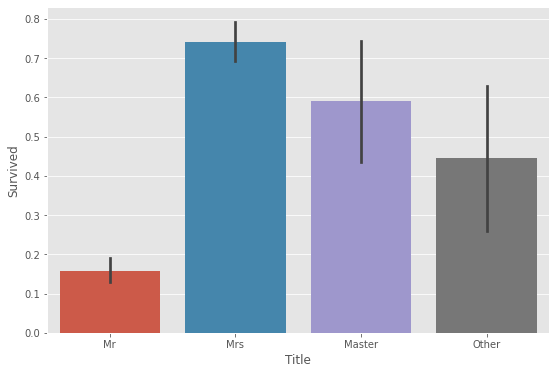

In [484]:
plt.figure(figsize=(9,6))
sns.barplot(x=data['Title'], y=data.Survived)
plt.xticks(np.arange(data.Title.nunique()),['Mr','Mrs','Master','Other'])
plt.show()

<font color='blue'>
* Survival rates of new categories

### Family Size

In [485]:
data['Family Size'] = data['Parch'] + data['SibSp'] + 1
data.head(15)

,level_0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,index,SexLabeled,Title,Family Size
0,0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0.0,1,0,2
1,1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1.0,0,1,2
2,2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,2.0,0,1,1
3,3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,3.0,0,1,2
4,4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,4.0,1,0,1
5,5,25.0,U,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,5.0,1,0,1
6,6,54.0,E,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,6.0,1,0,1
7,7,2.0,U,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,7.0,1,2,5
8,8,27.0,U,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,8.0,0,1,3
9,9,14.0,U,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,9.0,0,1,2


Family Size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.052632
7     0.333333
8     0.000000
11         NaN
Name: Survived, dtype: float64

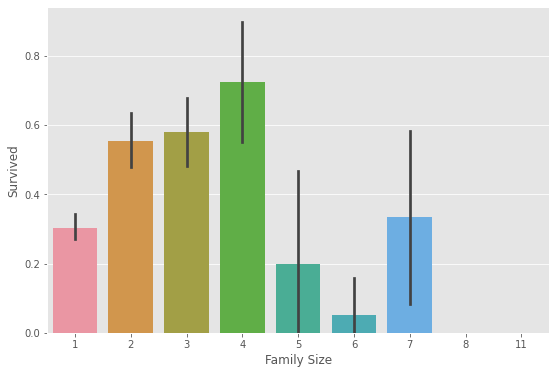

In [486]:
plt.figure(figsize=(9,6))
sns.barplot(x=data['Family Size'], y=data.Survived)

data.groupby('Family Size').Survived.mean()

<font color='green'>

We can determine some thresholds for rearraging the new feature:
<font color='blue'>

* 0 if p < 0.2
* 1 if p < 0.4 
* 2 if p > 0.4

In [487]:
data['Family Size'] = [0 if i==6 or i==5 else 1 if i==1 or i==7 else 2 for i in data['Family Size']]

,count,mean
Family Size,,
0,34,0.117647
1,549,0.304189
2,298,0.567114


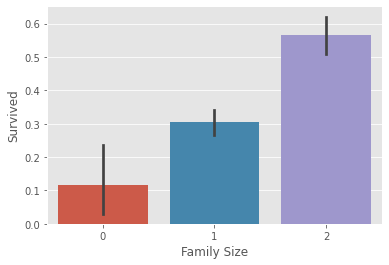

In [488]:
sns.barplot(x=data['Family Size'], y=data.Survived)


data.groupby('Family Size').Survived.agg(['count','mean'])

### Ticket

---
<font color='blue'>
* Tickets with the same codes will be grouped.

* Tickets without a prior code (only digits) will be group in a category called 'NC'

In [489]:
import string 

# string.punctuation : '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

new_tickets = []
for i in data.Ticket:
    if len(i.split()) > 1:  # if not only digits
        for j in string.punctuation:
            i = i.replace(j,'')
        new_tickets.append(i.split()[0])
        
    else: # if only digits
        new_tickets.append('NC')

In [490]:
data.Ticket = new_tickets

In [491]:
data[['Family Size', 'Parch', 'SibSp']].corr()

,Family Size,Parch,SibSp
Family Size,1.000000,0.174335,0.235148
Parch,0.174335,1.000000,0.350474
SibSp,0.235148,0.350474,1.000000


<b id=20>

# 8. Preprocessing

In [492]:
data.head(10)

,level_0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,index,SexLabeled,Title,Family Size
0,0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A5,0.0,1,0,2
1,1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC,1.0,0,1,2
2,2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STONO2,2.0,0,1,1
3,3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,NC,3.0,0,1,2
4,4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,NC,4.0,1,0,1
5,5,25.0,U,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,NC,5.0,1,0,1
6,6,54.0,E,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,NC,6.0,1,0,1
7,7,2.0,U,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,NC,7.0,1,2,0
8,8,27.0,U,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,NC,8.0,0,1,2
9,9,14.0,U,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,NC,9.0,0,1,2


<b id=21>

## Drop Unnecessary Features

<font color='blue'>

---
In this section, features given below will be dropped:
<font color='red'>

* level_0
* Cabin
* Name
* Parch
* PassengerId
* SibSp
* index
* SexLabeled

In [493]:
data.drop(['level_0','Name','index','SexLabeled'], axis=1, inplace=True)
# data.drop(['level_0','Cabin','Name','PassengerId','index','SexLabeled'], axis=1, inplace=True)

data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size
0,22.0,U,S,7.2500,0,1,3,male,1,0.0,A5,0,2
1,38.0,C,C,71.2833,0,2,1,female,1,1.0,PC,1,2
2,26.0,U,S,7.9250,0,3,3,female,0,1.0,STONO2,1,1
3,35.0,C,S,53.1000,0,4,1,female,1,1.0,NC,1,2
4,35.0,U,S,8.0500,0,5,3,male,0,0.0,NC,0,1


<b id=22>

## One-hot Encoding


---
**Categorical features** must be one-hot encoded before applying data mining techniques.

Also, one of the one-hot columns must be dropped to avoid multicollinearity leading the lower accuracy of created models.

<font color='blue'>
* get_dummies() method of Pandas does all these alone.
* **'drop_first = True'** parameter removes the first dummy variable.
    
<font color='green'>
Features to be one-hot encoded:
* Embarked
* Pclass
* Sex
* Title
* Family Size
* Ticket

In [494]:
one_hot_list = ['Embarked','Pclass','Sex','Title','Family Size','Cabin','Ticket']

data = pd.get_dummies(data, columns= one_hot_list, drop_first= True)

data.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,...,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP
0,22.0,7.2500,0,1,1,0.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,0,2,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,3,0,1.0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,35.0,53.1000,0,4,1,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,8.0500,0,5,0,0.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<b id=23>

## Train-Test Split

In [495]:
train = data[~data.Survived.isna()].reset_index(drop=True)
test  = data[data.Survived.isna()].drop(['Survived'], axis=1).reset_index(drop=True)
test_ID = test['PassengerId']
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

x_train = train.drop(['Survived'], axis=1)
y_train = train.Survived.values.reshape(-1,1)

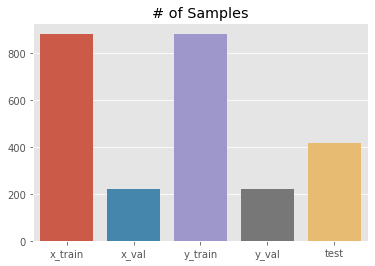

In [496]:
from sklearn.model_selection import train_test_split

x_trainn, x_val, y_trainn, y_val = train_test_split(x_train, y_train, test_size= 0.25, random_state=3)

sns.barplot(x=['x_train','x_val','y_train','y_val','test'], y=[len(x_train),len(x_val),len(y_train),len(y_val),len(test)])
plt.title('# of Samples')
plt.show()

<b id=24>

# 9. Classification
---

Methods that will be used:
<font color='blue'>
* Logistic Regression
* Linear Discriminant Analysis
* Decision Trees
* Random Forest
* Support Vector Machines

<b id=25> 
## Basic ML Classification Algorithms

In [497]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf_list = [KNeighborsClassifier(),
          LogisticRegression(),
          LinearDiscriminantAnalysis(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC()]

knn_params = {'n_neighbors':np.linspace(1,50,5, dtype=int),
             'weights':['uniform','distance'], 
             'metric':['euclidean','minkowski']}

lr_params = {'penalty':['l1','l2'],
            'C':np.logspace(-1,0,6)}

lda_prarams = {'solver':['svd','eigen']}


dtc_params = {'criterion':['gini','entropy'],
             'min_samples_leaf':range(1,65,10), # samples required to be a leaf(not an internal node)
             'max_depth':range(1,20,3)} 

rfc_params = {'n_estimators':range(100,301,100),
             'bootstrap':[False]}

svc_params = {'C':np.logspace(0,2,4),
             'gamma':np.logspace(-1,0,4),
             'probability':[True]}


grid_params = [knn_params, lr_params, lda_prarams, dtc_params, rfc_params, svc_params]

In [498]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_results = []
best_estimators = []

for clf, param in zip(clf_list, grid_params):
    
    gs  = GridSearchCV(estimator= clf, param_grid= param, cv= StratifiedKFold(5), scoring='accuracy')
    gs.fit(x_trainn, y_trainn)
    
    cv_results.append(gs.best_score_)
    best_estimators.append(gs.best_estimator_)
    print(clf,'\n\naccuracy: ',gs.score(x_val, y_val),'\n\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy:  0.7828054298642534 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy:  0.8190045248868778 


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

accuracy:  0.8280542986425339 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
 

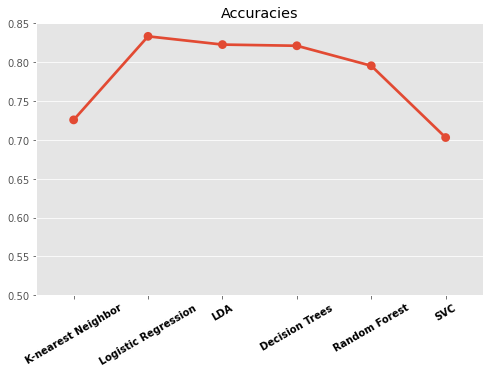

In [499]:
plt.figure(figsize=(8,5))
sns.pointplot(y=cv_results,x=['K-nearest Neighbor', 'Logistic Regression','LDA','Decision Trees','Random Forest','SVC'])
plt.title('Accuracies')
plt.xticks(rotation=30, color='black', fontweight='bold')
plt.yticks(np.arange(0.5,0.9,0.05))
plt.show()

<b id=26>

## Ensemble Modelling

### 1. Voting Classifier
<font color=blue>


---
The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities to predict the class labels.

In [500]:
from sklearn.ensemble import VotingClassifier


for voting in ('hard', 'soft'):
    globals()['votingclf_' + voting] = VotingClassifier(estimators=[('knn', best_estimators[0]),
                                             ('logreg', best_estimators[1]), 
                                             ('lda', best_estimators[2]), 
                                             ('dt', best_estimators[3]), 
                                             ('rf', best_estimators[4]),
                                             ('svc', best_estimators[5])],
                                             voting=voting)
    
    globals()['votingclf_' + voting] = globals()['votingclf_' + voting].fit(x_trainn, y_trainn)
    print('accuracy for voting = {}: {}'.format(voting, globals()['votingclf_' + voting].score(x_val, y_val)))

accuracy for voting = hard: 0.8416289592760181
accuracy for voting = soft: 0.8416289592760181


<b id=27>

### 2. Boosting Methods

#### Used Methods
<font color=blue>

* XG Boost
    
    
* Gradient Tree Boosting


* LightGBM


* CatBoost

In [501]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


xgb  = XGBClassifier(n_estimators=1000, learning_rate=0.01, reg_lambda=2)
gbc  = GradientBoostingClassifier(n_estimators=500)
lgbm = LGBMClassifier(n_estimators=100)

for i in [xgb, gbc, lgbm]:
    print(i)
    print('score: ',i.fit(x_trainn, y_trainn).score(x_val, y_val))
    print('accuracy: ',sum((i.predict(x_val) == y_val)[0])/len(y_val))
    print('auc: ',roc_auc_score(i.predict(x_val), y_val))
    print('confusion matrix\n',confusion_matrix(y_val, i.predict(x_val), labels=[0,1]), '\n\n')

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=2, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
score:  0.8597285067873304
accuracy:  0.6561085972850679
auc:  0.8617967332123412
confusion matrix
 [[124  10]
 [ 21  66]] 


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_node

<font color=blue>
* CatBoost

In [512]:
params = {'loss_function':'Logloss',
         'eval_metric':'AUC',
         'verbose':200,
         'iterations':1000}

cbc  = CatBoostClassifier(**params)
cbc.fit(x_trainn, y_trainn,
       eval_set=[(x_trainn, y_trainn), (x_val, y_val)],
       plot=True)

Learning rate set to 0.028598


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8542648	test1: 0.8417825	best: 0.8417825 (0)	total: 3.83ms	remaining: 3.83s
200:	test: 0.9423624	test1: 0.8623692	best: 0.8626265 (199)	total: 294ms	remaining: 1.17s
400:	test: 0.9683989	test1: 0.8709470	best: 0.8709470 (400)	total: 600ms	remaining: 896ms
600:	test: 0.9835488	test1: 0.8820981	best: 0.8826986 (599)	total: 893ms	remaining: 593ms
800:	test: 0.9907450	test1: 0.8887030	best: 0.8887030 (800)	total: 1.26s	remaining: 314ms
999:	test: 0.9947267	test1: 0.8930777	best: 0.8930777 (999)	total: 1.54s	remaining: 0us

bestTest = 0.8930777149
bestIteration = 999



<b id=28>

### 3. Stacking


In [507]:
final_estimators = [SVC(), LogisticRegression(), LinearDiscriminantAnalysis()]

estimators = [('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.01, reg_lambda=2)),
              ('gbc', GradientBoostingClassifier(n_estimators=500)),
              ('lgb', LGBMClassifier(n_estimators=100))]
#               ('catb', CatBoostClassifier(**params))]

for i in final_estimators:
    sc = StackingClassifier(estimators = estimators,
                           final_estimator= i,
                           cv = StratifiedKFold(5, shuffle=True, random_state=3))
    
    sc.fit(x_trainn, y_trainn)
    print(i, '\nScore: ' ,sc.score(x_val, y_val), '\n\n')
    print('Accuracy: ' ,sum((sc.predict(x_val) == y_val)[0])/len(y_val),'\n')
    print('Confusion Matrix\n', confusion_matrix(y_val, sc.predict(x_val)),'\n\n\n')


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
 0.8552036199095022 

0.669683257918552 


[[125   9]
 [ 23  64]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 0.8642533936651584 

0.6515837104072398 


[[124  10]
 [ 20  67]]
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 
 0.8687782805429864 

0.6561085972850679 


[[125   9]
 [ 20  67]]


<b id=29>
# Submission
<font color=blue>
Best score has been obtained by Stacking method with meta-classifier of LDA.

In [513]:
test_predictions = pd.Series(sc.predict(test), name = "Survived").astype(int)

results = pd.concat([test_ID, test_predictions],axis = 1)
results.to_csv("titanic.csv", index = False)